In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('E:/Dataset/Python/sales_of_product.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.shape

(107, 2)

In [6]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [7]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.drop(106,axis=0,inplace=True)

In [10]:
df.shape

(105, 2)

In [11]:
df.columns=["Month","Sales"]

In [12]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [13]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [14]:
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [16]:
df.set_index('Month',inplace=True)

In [17]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [18]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


### Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

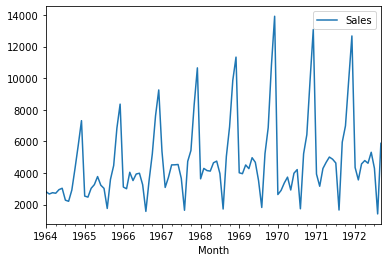

In [19]:
df.plot()

### Step 3: Using Augmented Dickey Fuller's test

In [20]:
!pip install statsmodels

In [21]:
#looking this graph,we can say this data is seasonal
#(seasonal is all about suppose in each yr in christmas sales goes up) and then down
# we plot,whether test is stationary or not
#if not stationery then how to make it stationery

In [22]:
#Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [23]:
#adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
#most imp is p-value
#this is almost similar to Hypothesis testing,whereas Null hypo which says Data is not Stationery
#whereas Alternate hypo says data is stationery
#if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is true,ie data is stationery

In [24]:
#zip basically combines result,labels
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print('{}:{}'.format(label,value))
    if result[1]<=0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

In [25]:
adfuller_test(df['Sales'])

ADF Test Statistic:-1.8335930563276237
p-value:0.3639157716602447
#Lags Used:11
Number of Observations Used:93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
#if our data is non-stationery,we have to make it stationery using various techniques such as Differencing & many more

### Step 4: Differencing to make data stationary

In [27]:
w=df['Sales'].shift(1)

In [28]:
w.tail()

Month
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, dtype: float64

In [29]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [30]:
#why taken shift(12),bcz basically year has 12 month cycle
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [31]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [32]:
## Again test dickey fuller test on df['Sales First Difference']
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-7.626619157213163
p-value:2.060579696813685e-11
#Lags Used:0
Number of Observations Used:92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [33]:
#now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo
#ie data is stationery
#if p-value is almost 0,then we have a wonderful stationery graph

<AxesSubplot:xlabel='Month'>

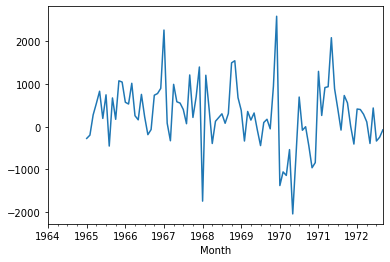

In [34]:
df['Seasonal First Difference'].plot()

### Step 5: ARIMA Model

In [35]:
#Autocorrelation(plot_acf),Partial Autocorrelation(plot_pacf)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

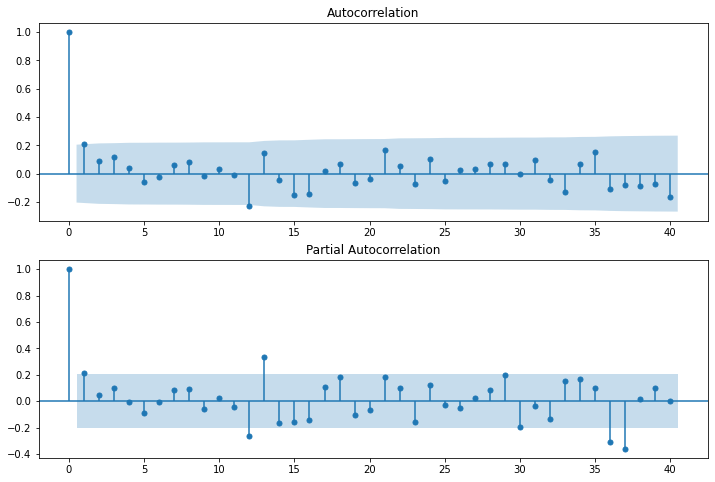

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [37]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [41]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\user-pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user-pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user-pc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

impor

In [42]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.263
Date:                Tue, 29 Jun 2021   AIC                           1910.251
Time:                        12:35:47   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7844     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [43]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

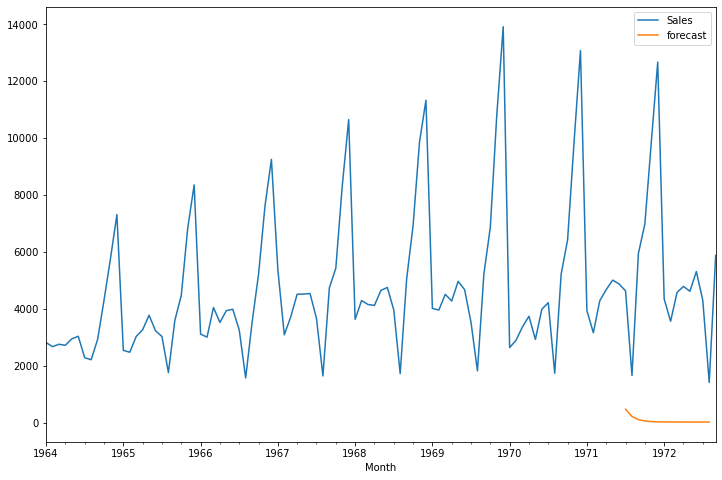

In [49]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [50]:
#here as we can see the predictions vary alot
#as our data of sales follows a seasonal pattern we use SARIMAX

### Step 6: SARIMAX Model

In [53]:
import statsmodels.api as sm

In [54]:
#seasonal_order=(1,1,1,12)
#(p,d,q,shift_value)
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\user-pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user-pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [55]:
#predicting from index 90 to 103
df['forecast_SM']=results.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

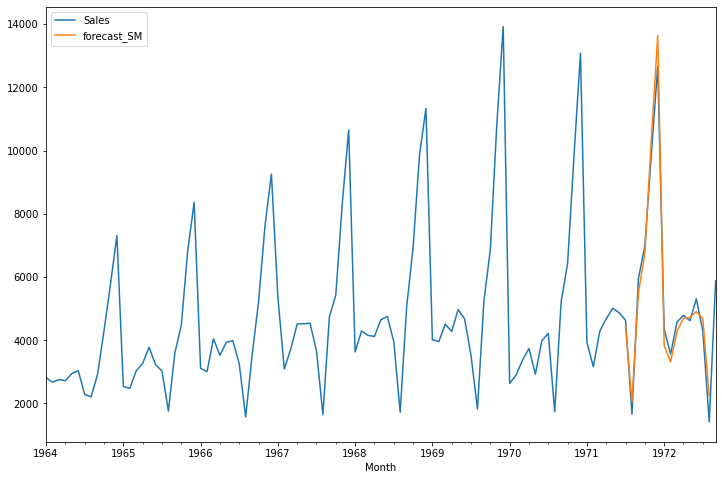

In [56]:
#blue line is original data anf orange is a forecasted data
df[['Sales','forecast_SM']].plot(figsize=(12,8))

### Step 7: Predicting on future data

In [57]:
# to see how future predictions/projections looks like
from pandas.tseries.offsets import DateOffset

In [58]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [68]:
future_dataset=[df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [71]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [72]:
future_dataset_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast,forecast_SM
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [73]:
future_df=pd.concat([df,future_dataset_df])

In [74]:
future_df.shape

(128, 5)

<AxesSubplot:>

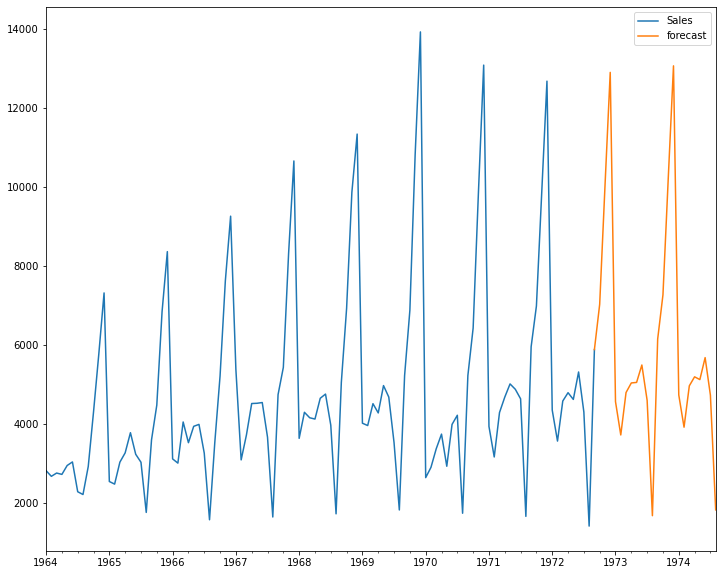

In [78]:
future_df['forecast']=results.predict(start=104,end=128,dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,10))